# Image segmentation by thresholding

Objective: We will apply or program basic and advanced functions of image segmentation by thresholding.

In [1]:
## Import of numpy, matplotlib, and opencv libraries.
import matplotlib.pyplot as plt 
import cv2
import numpy as np 

# Part 1

A program that reads a color image, converts it to grayscale, binarizes it, displays the results on the screen (color image, grayscale image, and binary image in three separate windows) and saves the result images in the appropriate format (ppm, pgm, pbm)


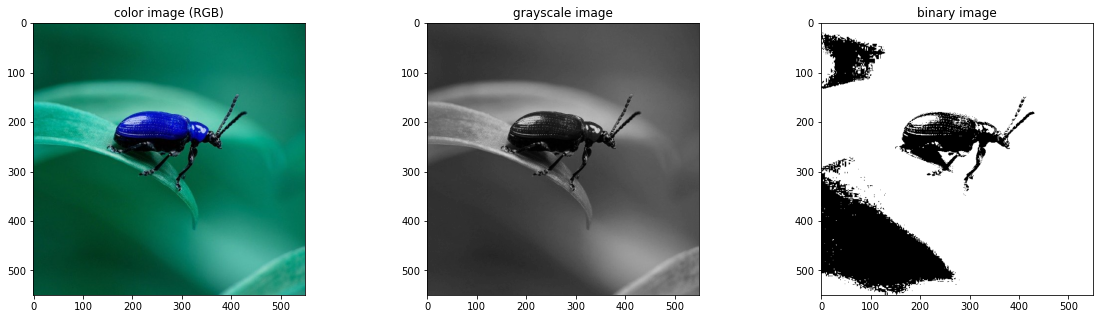

True

In [2]:
# reading the rgb image
img_rgb = cv2.imread('C://Users//33618//Desktop//Master2_IMOVI//Segmentation image et de video_TP//img_rgb.jpg') 
#conversion of rgb image to gray level image (rgb to gray)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# thresholding of the image with a threshold value = 50 (binarization)
thresh = 50
ret,img_BW = cv2.threshold(img_gray, thresh,255,0)

# Display color image, grayscale image, and binary image in three separate windows

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('color image (RGB)')
plt.subplot(1, 3, 2)
plt.imshow(img_gray, cmap='gray')
plt.title('grayscale image')
plt.subplot(1, 3, 3)
plt.imshow(img_BW, cmap='gray')
plt.title('binary image')
plt.show()

# Save the 3 result images in the appropriate format ("ppm" for the rgb image, "pgm" for the grayscale image, "pbm" for the binary image).
cv2.imwrite('img_RGB.ppm', img_rgb)
cv2.imwrite('img_Gray.pgm', img_gray)
cv2.imwrite('img_BW.pbm', img_BW)

# Part 2:
A program that reads a grayscale image (the image created earlier) and then displays the histogram of the image in a separate window. Dynamic histogram expansion programming to normalize the source image, i.e. adjust the scale of its gray levels so that the target image occupies the entire range of available intensities ([0,255])./ target(x,y)=(source(x,y)-min)×255/(max-min)

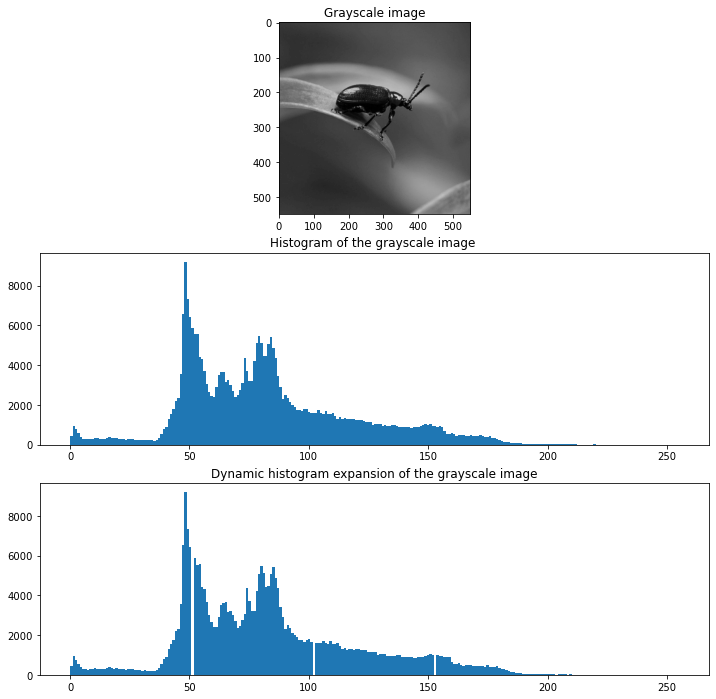

In [3]:
# Use of the grayscale image from part 1, with the ravel concept.
img_grayR = img_gray.ravel().astype(np.float32)

# Dynamic histogram expansion programming to normalize the source image (target(x,y)=(source(x,y)-min)×255/(max-min))
cible = 255*(img_grayR-img_grayR.min())/(img_grayR.max()-img_grayR.min())

# Display of the image histogram and its dynamic expansion 2 separate windows
plt.figure(figsize=(12, 12))

plt.subplot(3, 1, 1)
plt.imshow(img_gray,'gray')
plt.title('Grayscale image')
plt.subplot(3, 1, 2)
plt.hist(img_grayR,256,[0,255])
plt.title('Histogram of the grayscale image ')
plt.subplot(3, 1, 3)
plt.hist(cible,256,[0,255])
plt.title('Dynamic histogram expansion of the grayscale image')

plt.show()

Remark: in the previous figure, the dynamic histogram expansion of the grayscale image is very well programmed but it is not very visible for the image used (it is tested for several images and it works), I just liked to work on this image to have a good look and compare the results with the following parts) 

# Part 3 (Global Thresholding):
A program that reads a grayscale image and then displays the result of thresholding the image for the various "basic" thresholding operation types available in openCV (Threshold Binary, Threshold Binary Inverted, Truncate, Threshold to Zero, Threshold to Zero Inverted). 
Program a Range function that applies a double thresholding on the image (low and high). Test this function on the " hue " component of a color image (by an RGB to HSV decomposition) to select a hue range.

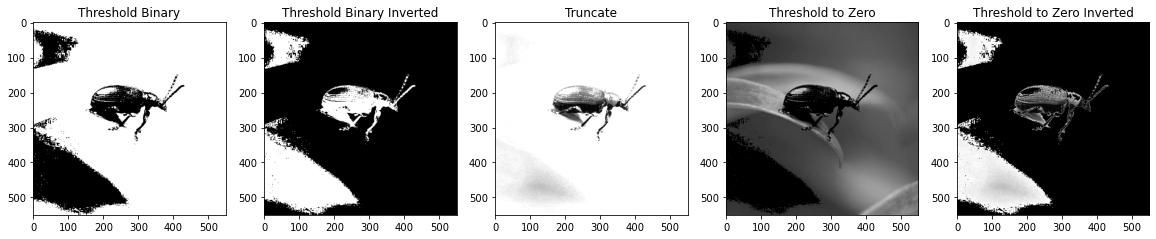

In [4]:
#### Part A:  
# Using the grayscale image from part 1.
# Thresholding the image with the openCV operation Threshold Binary :
ret, thresh1 = cv2.threshold(img_gray, 50, 255, cv2.THRESH_BINARY)
# Thresholding the image with the openCV operation Threshold Binary Inverted:
ret, thresh2 = cv2.threshold(img_gray, 50, 255, cv2.THRESH_BINARY_INV)
# Thresholding the image with the openCV operation Threshold Truncate:
ret, thresh3 = cv2.threshold(img_gray, 50, 255, cv2.THRESH_TRUNC)
# Thresholding the image with the openCV operation Threshold to Zero:
ret, thresh4 = cv2.threshold(img_gray, 50, 255, cv2.THRESH_TOZERO)
# Thresholding the image with the openCV operation Threshold to Zero Inverted:
ret, thresh5 = cv2.threshold(img_gray, 50, 255, cv2.THRESH_TOZERO_INV)

# Display the result images in 5 separate windows
plt.figure(figsize=(20,5))
plt.subplot(1,5,1)
plt.title("Threshold Binary")
plt.imshow(thresh1, cmap='gray')
plt.subplot(1,5,2)
plt.title("Threshold Binary Inverted")
plt.imshow(thresh2,cmap='gray')
plt.subplot(1,5,3)
plt.title("Truncate")
plt.imshow(thresh3,cmap='gray')
plt.subplot(1,5,4)
plt.title("Threshold to Zero")
plt.imshow(thresh4,cmap='gray')
plt.subplot(1,5,5)
plt.title("Threshold to Zero Inverted")
plt.imshow(thresh5,cmap='gray')

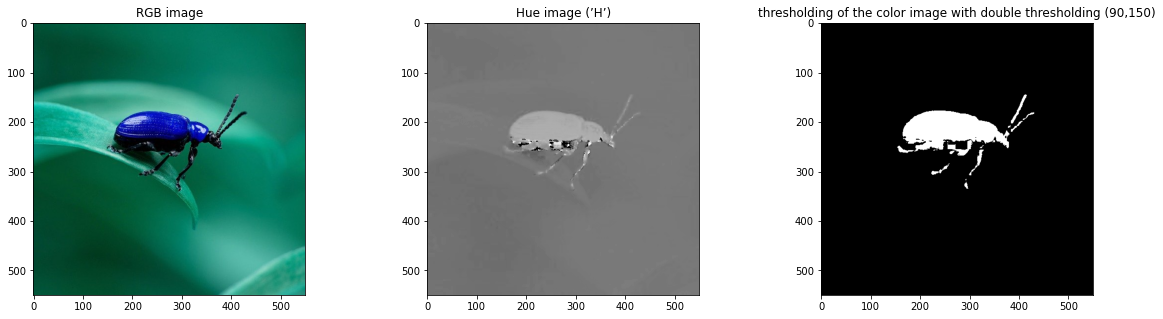

In [5]:
##### Part B:
# Programming a Range function that applies a double thresholding on the image (bottom and top)
def  Range(image, seuil_bas, seuil_haut):
    n = image.shape
    Img = np.zeros((n[0], n[1]))
    for j in range(n[0]):
        for i in range(n[1]):
            if image[j,i] > seuil_bas and image[j,i] < seuil_haut:
                Img[j,i] = 1
            else:
                Img[j,i] = 0
    return Img

# Test this Range function on the "hue" component of a color image (by an RGB to HSV decomposition) to select a hue range.

img_HSV = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV) # RGB to HSV image
img_H = img_HSV[:, :, 0] # Hue image 

# Application of the function on the tinted image with a double thresholding (low=90 and high=150)
Img_2seuil = Range(img_H, 90, 150)

# Display of the color image, the tinted image, and the resultant image of the Range function in 3 separate windows

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('RGB image')
plt.subplot(1, 3, 2)
plt.imshow(img_H, cmap='gray')
plt.title('Hue image (’H’)')
plt.subplot(1, 3, 3)
plt.imshow(Img_2seuil, cmap='gray')
plt.title('thresholding of the color image with double thresholding (90,150)')
plt.show()

# Part 4 (Adaptive local thresholding):
Programming an adaptive image thresholding function that relies on local averaging (with the neighborhood order controlled by a variable).
Comparison of the results with those obtained by the openCV functions ADAPTIVE_THRESH_MEAN_C and ADAPTIVE_THRESH_GAUSSIAN_C.

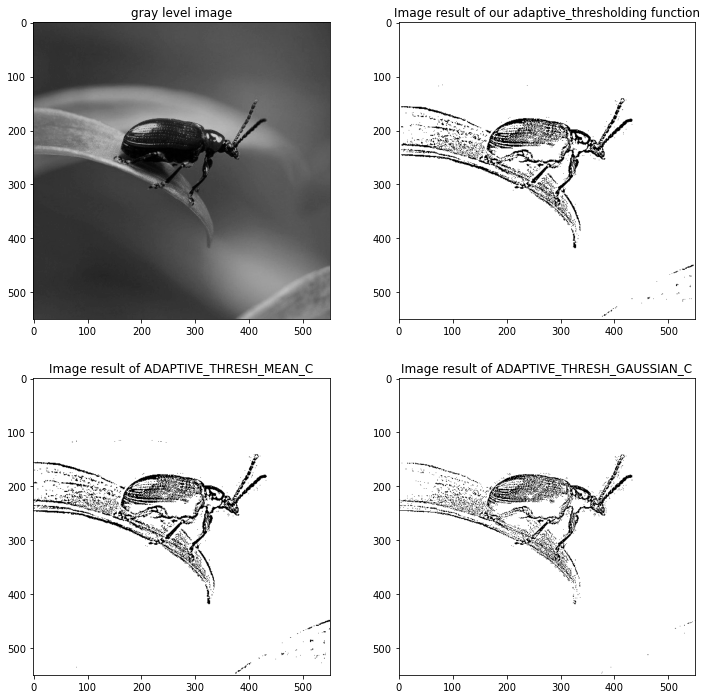

In [6]:
### Part A: Programming the adaptive image thresholding function

# Note: In this part, the code is inspired by the course "Convolutional Neural Networks" (https://www.deeplearning.ai/program/deep-learning-specialization/), 
# and the operation of the openCV functions ADAPTIVE_THRESH_MEAN_C and ADAPTIVE_THRESH_GAUSSIAN_C. 

def adaptive_thresholding(img_gray, size_Window, c):

    Size = img_gray.shape
    Img_test = np.zeros((Size[0], Size[1]))
    Img_resultat = np.zeros((Size[0], Size[1]))

   # Padding image or filling (filling the pixels of zero intensity around the outer edge of the image), so that so that 
   # the size of the resultant image has the same size as the original image, after the convolution operation.
    pad = int(size_Window/2)
    Img_pad = np.pad(img_gray, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)
    
    
    # W averaging convolution filter of size (size_Window, size_Window)
    W = np.ones((size_Window, size_Window))/(size_Window**2)
    
    stride = 1 # the convolution step is 1
    C = c # A variable of type double representing the constant subtracted from the average.
    
    for h in range(Size[0]):           # loop on the vertical axis of the image
        # the vertical beginning and end of W
        vert_start = h*stride
        vert_end = h*stride + size_Window  

        for w in range(Size[1]):       # loop on the horizontal axis of the image
            # the horizontal beginning and end of W
            horiz_start = w*stride
            horiz_end = w*stride + size_Window
            # the 3x3 slice in the image       
            Img_slice = Img_pad[vert_start:vert_end,horiz_start:horiz_end]              
            # Convolvolution of the image with the W filter
            Img_test[h, w]   = np.sum(Img_slice*W)
            if img_gray[h, w] > (Img_test[h, w]- c):
                Img_resultat[h, w] = 1
            else:
                Img_resultat[h, w] = 0              

    return Img_resultat

### Part 2: Comparison of the results with those obtained by the openCV functions ADAPTIVE_THRESH_MEAN_C and ADAPTIVE_THRESH_GAUSSIAN_C.

Img_adapt_seuil = adaptive_thresholding(img_gray, 9, 6) ## Image result of our adaptive_thresholding function with size_Window=9 and c=6, on the grayscale image of part 1
Img_adabt_mean = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 6) ## Image result of the openCV function ADAPTIVE_THRESH_MEAN_C, on the grayscale image of part 1
Img_adabt_gauss = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,9,6) ## Image result of the openCV function ADAPTIVE_THRESH_GAUSSIAN_C, on the grayscale image of part 1

# Display of the result images in 4 separate windows
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.imshow(img_gray,'gray')
plt.title('gray level image')
plt.subplot(2, 2, 2)
plt.imshow(Img_adapt_seuil,'gray')
plt.title('Image result of our adaptive_thresholding function')
plt.subplot(2, 2, 3)
plt.imshow(Img_adabt_mean, cmap='gray')
plt.title('Image result of ADAPTIVE_THRESH_MEAN_C')
plt.subplot(2, 2, 4)
plt.imshow(Img_adabt_gauss, cmap='gray')
plt.title('Image result of ADAPTIVE_THRESH_GAUSSIAN_C')
plt.show()

Result: The result image of our adaptive_thresholding function with the parameters size_Window=9 and c=6, and the result image of the openCV function ADAPTIVE_THRESH_MEAN_C (with the same parameters as the adaptive_thresholding function) applied to the grayscale image of part 1, are similar. And these results are very close to those of the openCV ADAPTIVE_THRESH_GAUSSIAN_C function.

# Part 5 (Thresholding by Otsu's algorithm):
Programming a thresholding_OTSU() function and comparing the results with the threshold() function provided by openCV cv.THRESH_OTSU.

<ipython-input-7-64968d3f95a6>:30: RuntimeWarning: divide by zero encountered in double_scalars
  Var[k] = (((image_gray.mean()*ProbPixel_C1[k]) - (np.sum(his[0:(k+1)])/np.sum(his))))**2 / (ProbPixel_C1[k]*ProbPixel_C2[k])


The optimal threshold of this image obtained by our thresholding_OTSU function is : 94
The threshold obtained by the openCV function cv2.THRESH_OTSU is : 96.0


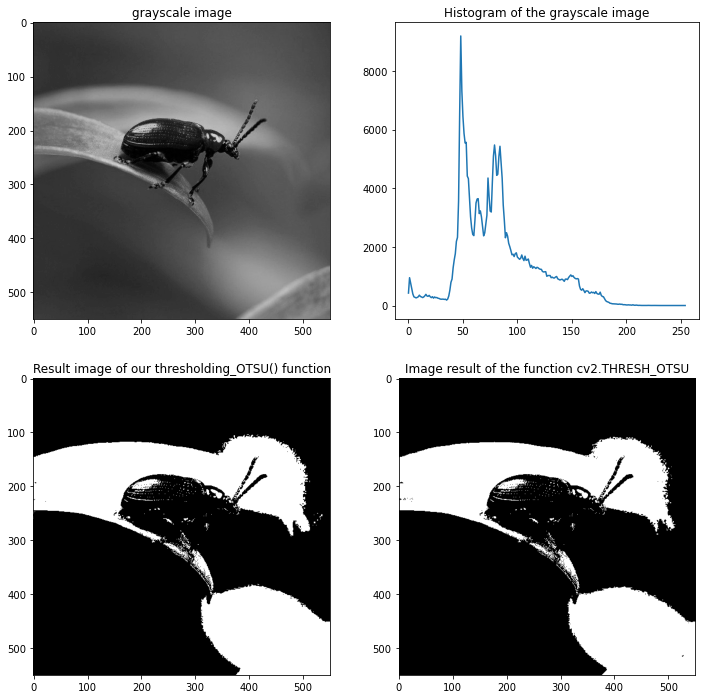

In [7]:
#### Programming of a thresholding function_OTSU()

# Remark: In this part, the program is inspired by the theoretical description of the 6 steps of the Otsu algorithm presented in: https: //www.kongakura.fr/article/M%C3%A9thode_d'Otsu

def thresholding_OTSU(image_gray):
    
    # Creation of 3 matrices that we will use in our for loop
    ProbPixel_C1 = np.zeros(255)
    ProbPixel_C2 = np.zeros(255)
    Var = np.zeros(255)
    
    # Construction of the histogram of the gray levels of the image (image_gray)
    hist, bins = np.histogram(img_grayR, np.array(range(0, 256)))
    
    # Normalization of the histogram obtained in 1. Normalizing the histogram, allows to obtain a histogram whose all 
    # values are between 0 and 1
    N = image_gray.shape[0]*image_gray.shape[1] ## total number of pixels in the image
    his=hist/N  # Normalization
    
    for k in range(255):
        # Compute the probability that a pixel of the image belongs to C1 (C1 is defined as being composed of pixels 
        # with a value between 0 and k)
        ProbPixel_C1[k] = his[k]/np.sum(his[0:(k+1)])
        
        # Compute the probability that a pixel in the image belongs to C2. By simply doing 1- proba(C1) calculated in 
        # the previous step. (C1 is defined as being composed of pixels with a value between 0 and k)
        ProbPixel_C2[k] = 1 - ProbPixel_C1[k]
       
        #  Calculation of the interclass variance between C1 and C2
        Var[k] = (((image_gray.mean()*ProbPixel_C1[k]) - (np.sum(his[0:(k+1)])/np.sum(his))))**2 / (ProbPixel_C1[k]*ProbPixel_C2[k])
    
    # the optimal threshold is the K with the lowest interclass variance.
    thresh = np.where(Var == Var.min())
    thresh = thresh[0][0]

    ret,img_BW = cv2.threshold(image_gray, thresh, 255, 0)
    
    return hist, thresh, img_BW
    
#### Comparation of our results with the threshold() function provided by openCV cv.THRESH_OTSU.

hist, Seuil_optimal, Img_result = thresholding_OTSU(img_gray) # results of our function with output : histogram, optimal threshold, result image 

Seuil_Otsu, Otsu_img = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) # results of the function cv2.THRESH_OTSU
    
print('The optimal threshold of this image obtained by our thresholding_OTSU function is :',Seuil_optimal)
print('The threshold obtained by the openCV function cv2.THRESH_OTSU is :',Seuil_Otsu)
# Display of the result images in 4 separate windows
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.imshow(img_gray,'gray')
plt.title('grayscale image')
plt.subplot(2, 2, 2)
plt.plot(hist)
plt.title('Histogram of the grayscale image')
plt.subplot(2, 2, 3)
plt.imshow(Img_result, cmap='gray')
plt.title('Result image of our thresholding_OTSU() function')
plt.subplot(2, 2, 4)
plt.imshow(Otsu_img, cmap='gray')
plt.title('Image result of the function cv2.THRESH_OTSU')
plt.show()

Result: The result image of our thresholding function_OTSU(), and the result image of the openCV function cv2.THRESH_OTSU applied to the grayscale image of part 1, are very close.